# 名企bi班+week1+李星星

## Thinking

Thinking1:既然内容相似度计算简单，能频繁更新，为什么还需要协同过滤算法呢？

    答：内容相似度计算属于动态，协同过滤属于静态。动态更容易反映当前实时的变化；对新用户往往不了解他的兴趣爱好和行为习惯就会用到协同过滤这种静态算法。
    
    
Thinking2:你需要推荐系统么？哪些情况下不需要推荐系统？

    答：我既需要推荐系统又不需要推荐系统，不需要的原因是因为我还没有到使用推荐系统的规模，用户量太少，只有一个人，没必要耗费那么高的成本去做一套针对一个人的推荐系统；需要是因为当前生活中处处拥有推荐系统，如淘宝、京东这种电商，他会推荐你所感兴趣的东西，可以减少你所浏览物品的时长，也可以增加你当前使用APP的好感度。


Thinking3:如果给一个视频打标签，视频中有音乐作为背景音乐，采用了NLP方式对内容自动打标签，可能存在什么问题？

    答：噪音过大的问题，使用NLP方式可能会对视频里的背景乐进行分析，与当前视频所要表达的意思不符。

## Action
用cart实现mnist分类

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,roc_auc_score,f1_score
from sklearn.datasets import load_digits

In [71]:
#1.加载手写体数据集
digits=load_digits()
data=digits.data
print("维度：",data.shape)
print(digits.images[0])
print(digits.target[0])

维度： (1797, 64)
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
0


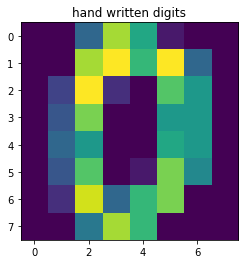

In [72]:
%matplotlib inline
#展示
plt.title("hand written digits")
plt.imshow(digits.images[0])

In [73]:
#2.数据标准化
ss=StandardScaler()
ss.fit_transform(data)

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [74]:
#2.分割数据
train_x,test_x,train_y,test_y=train_test_split(data,digits.target,test_size=0.2,random_state=1)
print(test_y)


[1 5 0 7 1 0 6 1 5 4 9 2 7 8 4 6 9 3 7 4 7 1 8 6 0 9 6 1 3 7 5 9 8 3 2 8 8
 1 1 0 7 9 0 0 8 7 2 7 4 3 4 3 4 0 4 7 0 5 5 5 2 1 7 0 5 1 8 3 3 4 0 3 7 4
 3 4 2 9 7 3 2 5 3 4 1 5 5 2 5 2 2 2 2 7 0 8 1 7 4 2 3 8 2 3 3 0 2 9 9 2 3
 2 8 1 1 9 1 2 0 4 8 5 4 4 7 6 7 6 6 1 7 5 6 3 8 3 7 1 8 5 3 4 7 8 5 0 6 0
 6 3 7 6 5 6 2 2 2 3 0 7 6 5 6 4 1 0 6 0 6 4 0 9 3 8 1 2 3 1 9 0 7 6 2 9 3
 5 3 4 6 3 3 7 4 9 2 7 6 1 6 8 4 0 3 1 0 9 9 9 0 1 8 6 8 0 9 5 9 8 2 3 5 3
 0 8 7 4 0 3 3 3 6 3 3 2 9 1 6 9 0 4 2 2 7 9 1 6 7 6 3 7 1 9 3 4 0 6 4 8 5
 3 6 3 1 4 0 4 4 8 7 9 1 5 2 7 0 9 0 4 4 0 1 0 6 4 2 8 5 0 2 6 0 1 8 2 0 9
 5 6 2 0 5 0 9 1 4 7 1 7 0 6 6 8 0 2 2 6 9 9 7 5 1 7 6 4 6 1 9 4 7 1 3 7 8
 1 6 9 8 3 2 4 8 7 5 5 6 9 9 8 5 0 0 4 9 3 0 4 9 4 2 5]


In [77]:
#4.创建cart模型
cart=DecisionTreeClassifier()
cart.fit(train_x,train_y) # train

y_pred=cart.predict(test_x) #test
print("准确率：%4f"%accuracy_score(test_y,y_pred))
# print("精确率：%4f"%precision_score(y_pred,test_y))
# print("f1-score:%4f"%(f1_score(y_pred,test_y)))
# print("roc_auc_score:%4f"% roc_auc_score(y_pred,test_y))

准确率：0.863889
